# EDA - Bike Share System in the SF Bay Area

Author: Owen Hsu 

## Table of content

1. Loading and Setup
2. Assessment
3. EDA

In this notebook, we will further examine the dataset and visualize the results (EDA).

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

## Assessment

In [2]:
# Load the dataset
df = pd.read_parquet('data/BikeData_after_DataCleaning.parquet')

In [3]:
# Print the shape of the data
df.shape

(7337194, 15)

In [4]:
# Look at the first 5 rows
df.head()

,time,station_id,bikes_available,docks_available,dock_count,date,mean_temperature_f,mean_dew_point_f,mean_humidity,mean_sea_level_pressure_inches,mean_visibility_miles,mean_wind_speed_mph,cloud_cover,wind_dir_degrees,zip_code
0,2014-05-01 00:00:00,2,12,15,27,2014-05-01,75.0,45.0,41.0,30.06,10.0,6.0,3.0,290.0,95113
1,2014-05-01 00:05:00,2,12,15,27,2014-05-01,75.0,45.0,41.0,30.06,10.0,6.0,3.0,290.0,95113
2,2014-05-01 00:10:00,2,12,15,27,2014-05-01,75.0,45.0,41.0,30.06,10.0,6.0,3.0,290.0,95113
3,2014-05-01 00:15:00,2,12,15,27,2014-05-01,75.0,45.0,41.0,30.06,10.0,6.0,3.0,290.0,95113
4,2014-05-01 00:20:00,2,12,15,27,2014-05-01,75.0,45.0,41.0,30.06,10.0,6.0,3.0,290.0,95113


In [5]:
# Get a quick overview of dataset variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337194 entries, 0 to 7337193
Data columns (total 15 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   time                            datetime64[ns]
 1   station_id                      int64         
 2   bikes_available                 int64         
 3   docks_available                 int64         
 4   dock_count                      int64         
 5   date                            datetime64[ns]
 6   mean_temperature_f              float64       
 7   mean_dew_point_f                float64       
 8   mean_humidity                   float64       
 9   mean_sea_level_pressure_inches  float64       
 10  mean_visibility_miles           float64       
 11  mean_wind_speed_mph             float64       
 12  cloud_cover                     float64       
 13  wind_dir_degrees                float64       
 14  zip_code                        int64         
dty

In [6]:
# Sanity check to make sure we don't have any NAs
df.isna().sum()

time                              0
station_id                        0
bikes_available                   0
docks_available                   0
dock_count                        0
date                              0
mean_temperature_f                0
mean_dew_point_f                  0
mean_humidity                     0
mean_sea_level_pressure_inches    0
mean_visibility_miles             0
mean_wind_speed_mph               0
cloud_cover                       0
wind_dir_degrees                  0
zip_code                          0
dtype: int64

**Methodology:**

The information provided is a summary of a pandas DataFrame with 7,337,194 rows and 15 columns. The DataFrame has undergone data filtering and cleaning, and the output represents the current state of the DataFrame after these operations.

1. Data filtering and cleaning: The initial DataFrame had 71,984,434 rows, but some rows were removed during data filtering and cleaning, resulting in the DataFrame now containing 7,337,194 rows.
2. Columns and Data Types: The DataFrame contains 15 columns, with 13 columns having a numerical data type (5 int64 and 12 float64) and 2 columns having a date data type (datetime64). The numerical columns likely represent continuous or discrete numeric features, while the datetime columns may contain date and time data.
3. Calculation of missing values: For each column, the sanity check shows the total number of missing values. This information indicates that there are no missing values in any of the 15 columns.
<br />

**Findings:**

1. The DataFrame has been filtered and cleaned to contain 7,337,194 rows out of the original 71,984,434 rows.
2. The DataFrame contains 15 columns, consisting of 13 numerical columns and 2 datetime columns.
3. There are no missing values in any of the columns.

In [7]:
# Get a statistical summary of the dataset
df.describe()

,time,station_id,bikes_available,docks_available,dock_count,date,mean_temperature_f,mean_dew_point_f,mean_humidity,mean_sea_level_pressure_inches,mean_visibility_miles,mean_wind_speed_mph,cloud_cover,wind_dir_degrees,zip_code
count,7337194,7.337194e+06,7.337194e+06,7.337194e+06,7.337194e+06,7337194,7.337194e+06,7.337194e+06,7.337194e+06,7.337194e+06,7.337194e+06,7.337194e+06,7.337194e+06,7.337194e+06,7.337194e+06
mean,2014-10-30 13:33:29.071412224,4.299356e+01,8.296316e+00,9.359660e+00,1.765689e+01,2014-10-30 01:35:59.101914112,6.154861e+01,4.968303e+01,6.859634e+01,3.001985e+01,9.598144e+00,6.647163e+00,3.262926e+00,2.585680e+02,9.433987e+04
min,2014-05-01 00:00:00,2.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,2014-05-01 00:00:00,4.100000e+01,1.300000e+01,2.400000e+01,2.963000e+01,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.404100e+04
25%,2014-07-31 01:55:00,2.400000e+01,5.000000e+00,6.000000e+00,1.500000e+01,2014-07-31 00:00:00,5.700000e+01,4.600000e+01,6.300000e+01,2.993000e+01,1.000000e+01,4.000000e+00,1.000000e+00,2.470000e+02,9.410700e+04
50%,2014-10-30 20:45:00,4.200000e+01,8.000000e+00,9.000000e+00,1.500000e+01,2014-10-30 00:00:00,6.200000e+01,5.000000e+01,6.900000e+01,3.000000e+01,1.000000e+01,6.000000e+00,3.000000e+00,2.850000e+02,9.410700e+04
75%,2015-01-29 20:30:00,6.400000e+01,1.100000e+01,1.200000e+01,1.900000e+01,2015-01-29 00:00:00,6.700000e+01,5.500000e+01,7.500000e+01,3.011000e+01,1.000000e+01,9.000000e+00,5.000000e+00,3.080000e+02,9.430100e+04
max,2015-04-30 23:55:00,8.400000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2015-04-30 00:00:00,8.400000e+01,6.500000e+01,9.600000e+01,3.041000e+01,2.000000e+01,2.300000e+01,8.000000e+00,3.600000e+02,9.511300e+04
std,NaN,2.399402e+01,4.173161e+00,4.229201e+00,3.982221e+00,NaN,6.557668e+00,6.848807e+00,1.073235e+01,1.291384e-01,1.313508e+00,3.303102e+00,2.229327e+00,8.261647e+01,4.248337e+02


## EDA

Let's prints the unique values present in the 'dock_count' column, which represents the different toatl dock numbers in the dataset:

In [9]:
# Check the dock count in each bike station
df.groupby('station_id')['dock_count'].mean().astype(int).value_counts()

dock_count
15    34
19    18
23     9
27     4
11     4
25     1
Name: count, dtype: int64

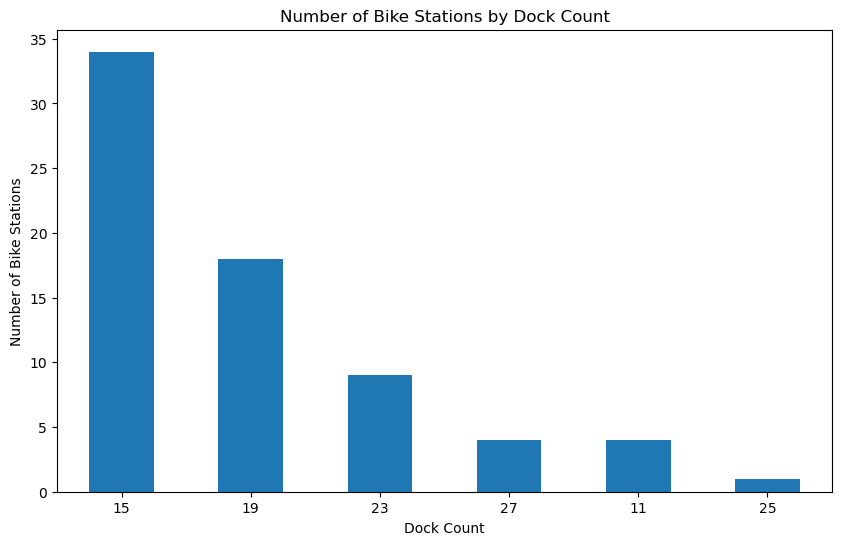

In [10]:
# Create the plot to show the number of bike stations for each dock count
plt.figure(figsize=(10, 6))
df.groupby('station_id')['dock_count'].mean().astype(int).value_counts().plot(kind='bar')
plt.xlabel('Dock Count')
plt.ylabel('Number of Bike Stations')
plt.title('Number of Bike Stations by Dock Count')
plt.xticks(rotation=0)  
plt.show()

We will create a new column 'usage_rate' by dividing 'docks_available' by 'dock_count' in the DataFrame. A higher value represents more people are renting bikes from the station. Thus, there are fewer available bikes and more available docks.

In [11]:
# Create 'usage_rate' columns in df
df['usage_rate'] = df['docks_available'] / df['dock_count'] * 100

In [12]:
# Check all distinct values of usage_rate
df['usage_rate'].value_counts()

usage_rate
53.333333     529849
60.000000     489113
46.666667     475596
40.000000     394533
66.666667     392123
               ...  
96.000000        502
16.000000        454
12.000000        396
104.000000       289
8.000000         225
Name: count, Length: 110, dtype: int64

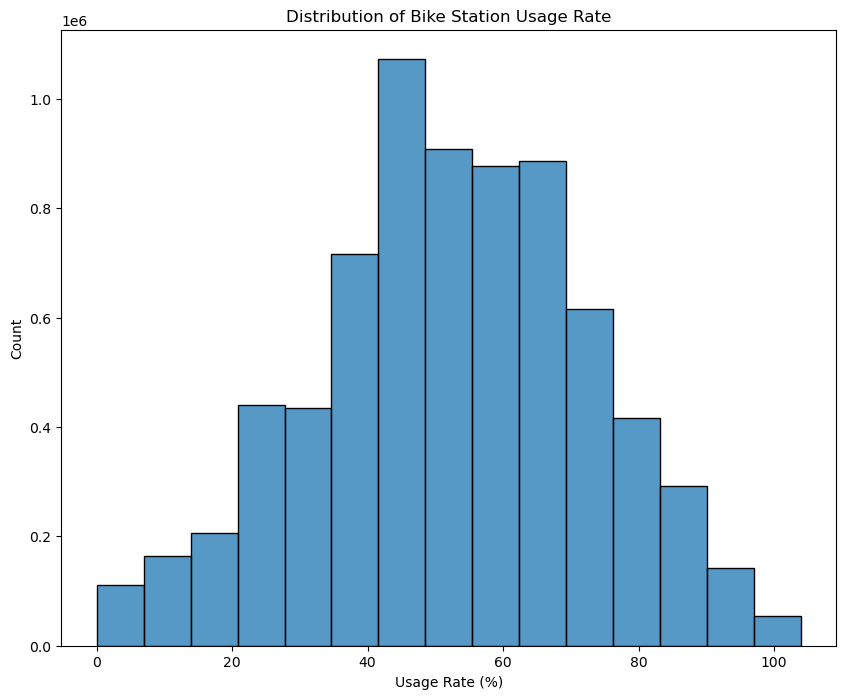

In [13]:
# Create a hist plot to check the distribution in 'usage_rate' column
plt.figure(figsize=(10, 8))
sns.histplot(df['usage_rate'], bins=15)
plt.xlabel('Usage Rate (%)')
plt.ylabel('Count')
plt.title('Distribution of Bike Station Usage Rate')
plt.show()

Based on the 'usage_rate', we will create a new column called 'usage_rate_category' in the DataFrame (df) to categorize the usage rate according to the following rules:
- Usage Rate >= 70 : High 
- Usage Rate < 70 & Usage Rate > 30: Median 
- Usage Rate <= 30 : Low 

In [14]:
# Define the conditions and corresponding values
conditions = [
    (df['usage_rate'] >= 70),
    (df['usage_rate'] < 70) & (df['usage_rate'] > 30),
    (df['usage_rate'] <= 30)
]
values = ['High', 'Median', 'Low']

# Create the 'usage_rate_category' column based on the conditions
df['usage_rate_category'] = np.select(conditions, values, default=np.nan)

In [15]:
# Check all distinct values of usage_rate_category
df['usage_rate_category'].value_counts()

usage_rate_category
Median    4928851
High      1465943
Low        942400
Name: count, dtype: int64

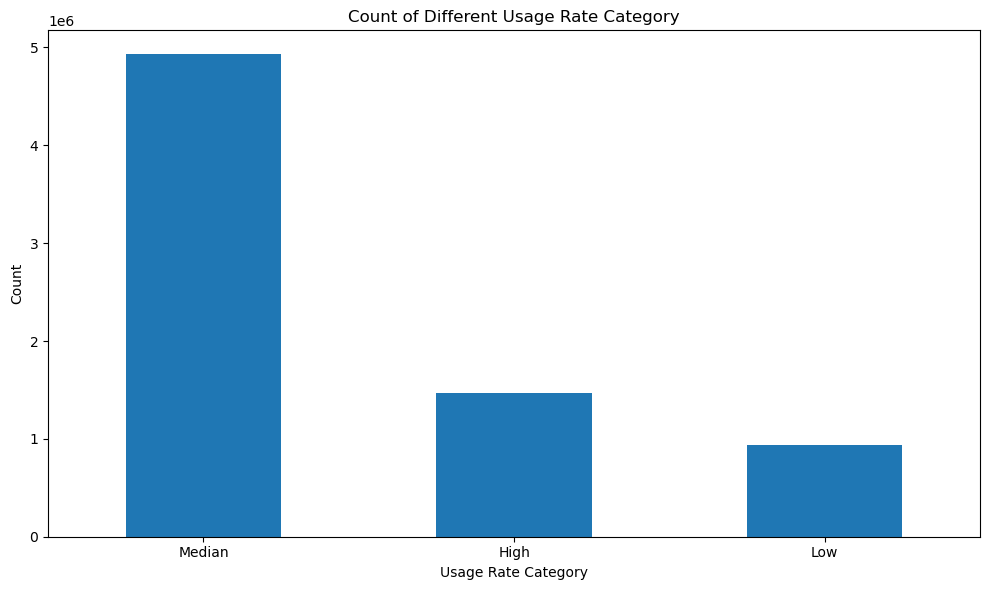

In [16]:
# Create a bar plot for the count of each unique value in 'usage_rate_category' column
plt.figure(figsize=(10, 6))
df['usage_rate_category'].value_counts().plot(kind='bar')
plt.xlabel('Usage Rate Category')
plt.ylabel('Count')
plt.title('Count of Different Usage Rate Category')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

The bar plot visually represents the distribution of bike station's usage rate status, showing the count of usage rate in each category. This plot provides an overview of the bike station's usage rate status distribution in the dataset.

In [17]:
# Get the percentage of each unique value in 'usage_rate_category' column
df['usage_rate_category'].value_counts() / len(df) * 100

usage_rate_category
Median    67.176239
High      19.979613
Low       12.844147
Name: count, dtype: float64

In our dataset, 67.1% of the usage rate is categorized as median, 19.9% as high, and 12.8% as low.

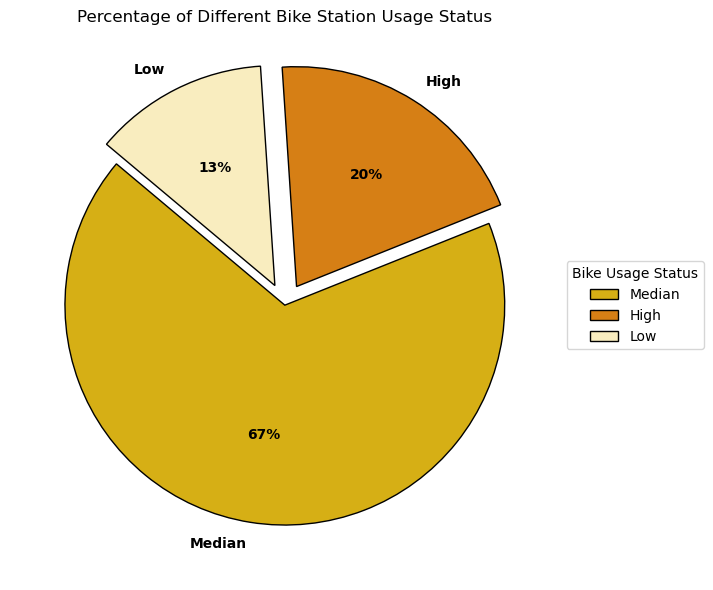

In [18]:
# plot a Pie chart to show the percentage of each unique value in 'usage_rate_category' column
plt.figure(figsize=(10, 6))
usage_status_counts = df['usage_rate_category'].value_counts()
colors = ['#d6af15', '#d67f15', '#f9edbf']
explode = [0, 0.1, 0.1]  # To create a slight separation between slices

# Plot the pie chart with legend, rounded percentages, and black outline
plt.pie(usage_status_counts, labels=usage_status_counts.index,autopct='%1.0f%%', colors=colors, startangle=140, explode=explode,
        wedgeprops={'edgecolor': 'black'}, textprops={'weight': 'bold'})

plt.legend(title='Bike Usage Status', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Percentage of Different Bike Station Usage Status')
plt.tight_layout()
plt.show()

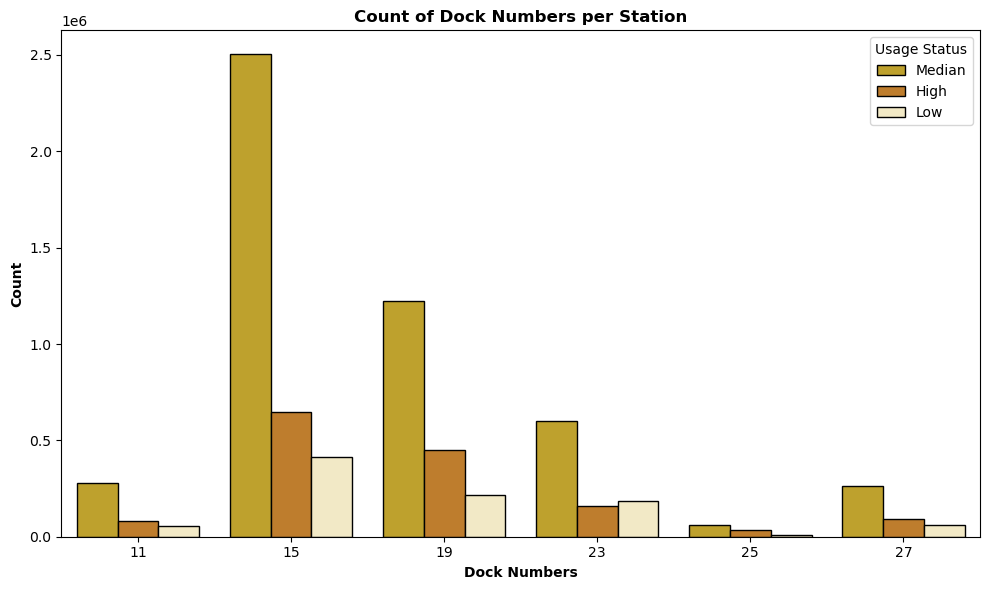

In [19]:
# Define the custom color palette to match the pie chart and histogram colors
color = ['#d6af15', '#d67f15', '#f9edbf']

# Countplot per grade with matching colors and dock_order
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dock_count', hue='usage_rate_category', palette=color,
              edgecolor='black')

plt.xlabel('Dock Numbers', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Count of Dock Numbers per Station', fontweight='bold')
plt.legend(title='Usage Status', loc='upper right')

plt.tight_layout()
plt.show()

The lower the dock number of the station, the more likely it is to have either a higher or lower usage rate. This is expected, as smaller bike stations' usage rates are more sensitive to the available bike and dock numbers.

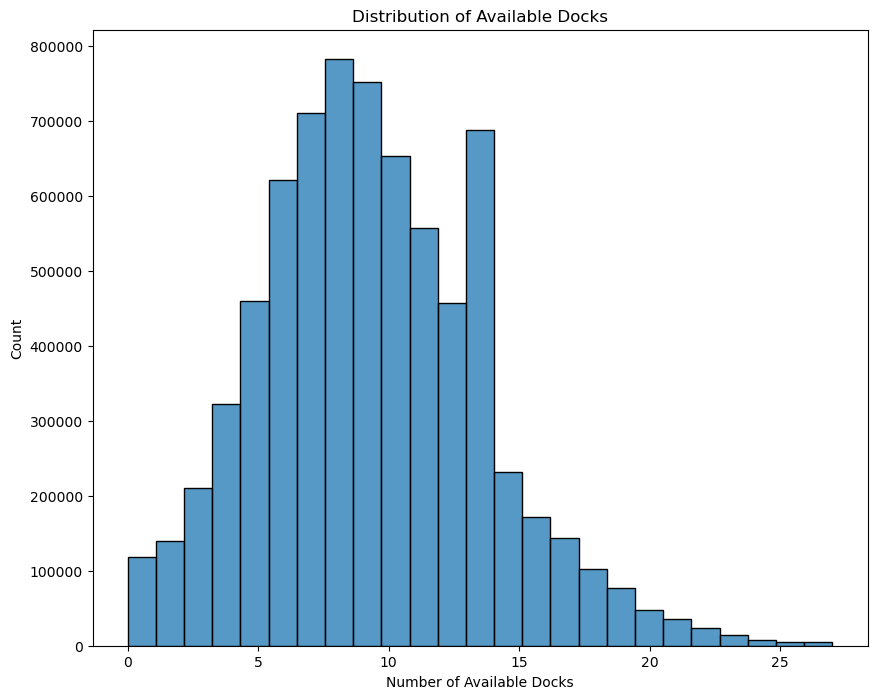

In [20]:
# Plot a histogram of docks_available
plt.figure(figsize=(10, 8))
sns.histplot(df['docks_available'], bins=25)
plt.xlabel('Number of Available Docks')
plt.ylabel('Count')
plt.title('Distribution of Available Docks')
plt.show()

The histogram shows the distribution of number of available docks in the dataset. Most of the number of available docks are ranging from 5 to 13.

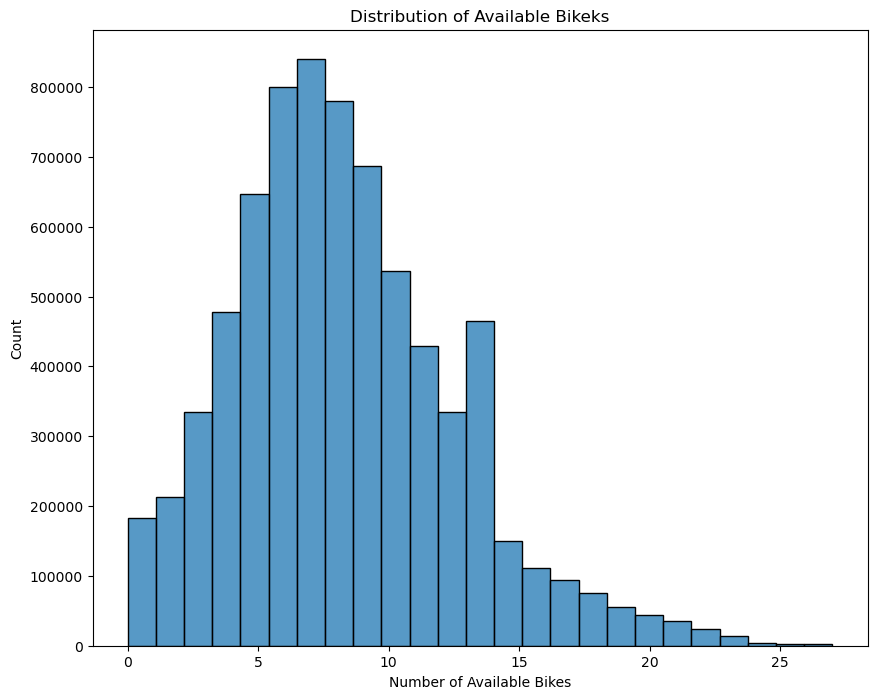

In [21]:
# Plot a histogram of bikes_available
plt.figure(figsize=(10, 8))
sns.histplot(df['bikes_available'], bins=25)
plt.xlabel('Number of Available Bikes')
plt.ylabel('Count')
plt.title('Distribution of Available Bikeks')
plt.show()

The histogram shows the distribution of number of available bikes in the dataset.

#### Detecting Collinearity

Let's look at the correlation and explore collinearity in our dataset.

We will convert column 'usage_rate_category' into a numerical one, where 1 represents low usage, 2 represents median usage, and 3 represents high usage.

In [22]:
# # Convert the 'usage_rate_category' column to a numerical one
df['usage_rate_category'] = df['usage_rate_category'].replace({'Low': 1, 'Median': 2, 'High': 3}).astype(int)

In [23]:
# Checking the correlation among columns
df.corr()

,time,station_id,bikes_available,docks_available,dock_count,date,mean_temperature_f,mean_dew_point_f,mean_humidity,mean_sea_level_pressure_inches,mean_visibility_miles,mean_wind_speed_mph,cloud_cover,wind_dir_degrees,zip_code,usage_rate,usage_rate_category
time,1.000000,0.000266,-0.022141,0.020371,0.000052,0.999996,-0.581354,-0.407218,0.125994,0.407968,-0.234657,-0.287541,0.025685,-0.149177,-0.000170,0.029253,0.028269
station_id,0.000266,1.000000,0.088507,0.130960,0.240186,0.000266,-0.099119,0.041209,0.135413,0.004335,-0.053069,0.227549,0.174019,-0.019513,-0.565970,0.018930,0.020484
bikes_available,-0.022141,0.088507,1.000000,-0.539947,0.468205,-0.022103,-0.012698,0.010491,0.023796,-0.004713,-0.029749,0.040047,0.045892,-0.021440,-0.040046,-0.862922,-0.753327
docks_available,0.020371,0.130960,-0.539947,1.000000,0.487991,0.020337,-0.030538,-0.010590,0.025666,0.005097,-0.024517,0.043292,0.032623,0.003547,-0.125506,0.849579,0.738409
dock_count,0.000052,0.240186,0.468205,0.487991,1.000000,0.000052,-0.046707,-0.000437,0.048913,0.001100,-0.056324,0.094605,0.085198,-0.019028,-0.172166,-0.005469,-0.008284
date,0.999996,0.000266,-0.022103,0.020337,0.000052,1.000000,-0.581357,-0.407221,0.125994,0.407971,-0.234657,-0.287543,0.025684,-0.149175,-0.000170,0.029216,0.028237
mean_temperature_f,-0.581354,-0.099119,-0.012698,-0.030538,-0.046707,-0.581357,1.000000,0.651168,-0.252421,-0.550511,0.315224,0.226964,-0.101560,0.297964,0.082113,-0.014773,-0.014830
mean_dew_point_f,-0.407218,0.041209,0.010491,-0.010590,-0.000437,-0.407221,0.651168,1.000000,0.505037,-0.483535,0.005533,0.189277,0.328432,0.128495,-0.075437,-0.015211,-0.018005
mean_humidity,0.125994,0.135413,0.023796,0.025666,0.048913,0.125994,-0.252421,0.505037,1.000000,-0.024899,-0.430283,-0.063324,0.542628,-0.188503,-0.202254,0.006200,0.001678
mean_sea_level_pressure_inches,0.407968,0.004335,-0.004713,0.005097,0.001100,0.407971,-0.550511,-0.483535,-0.024899,1.000000,-0.129369,-0.386740,-0.124197,-0.061152,-0.026753,0.008622,0.010307


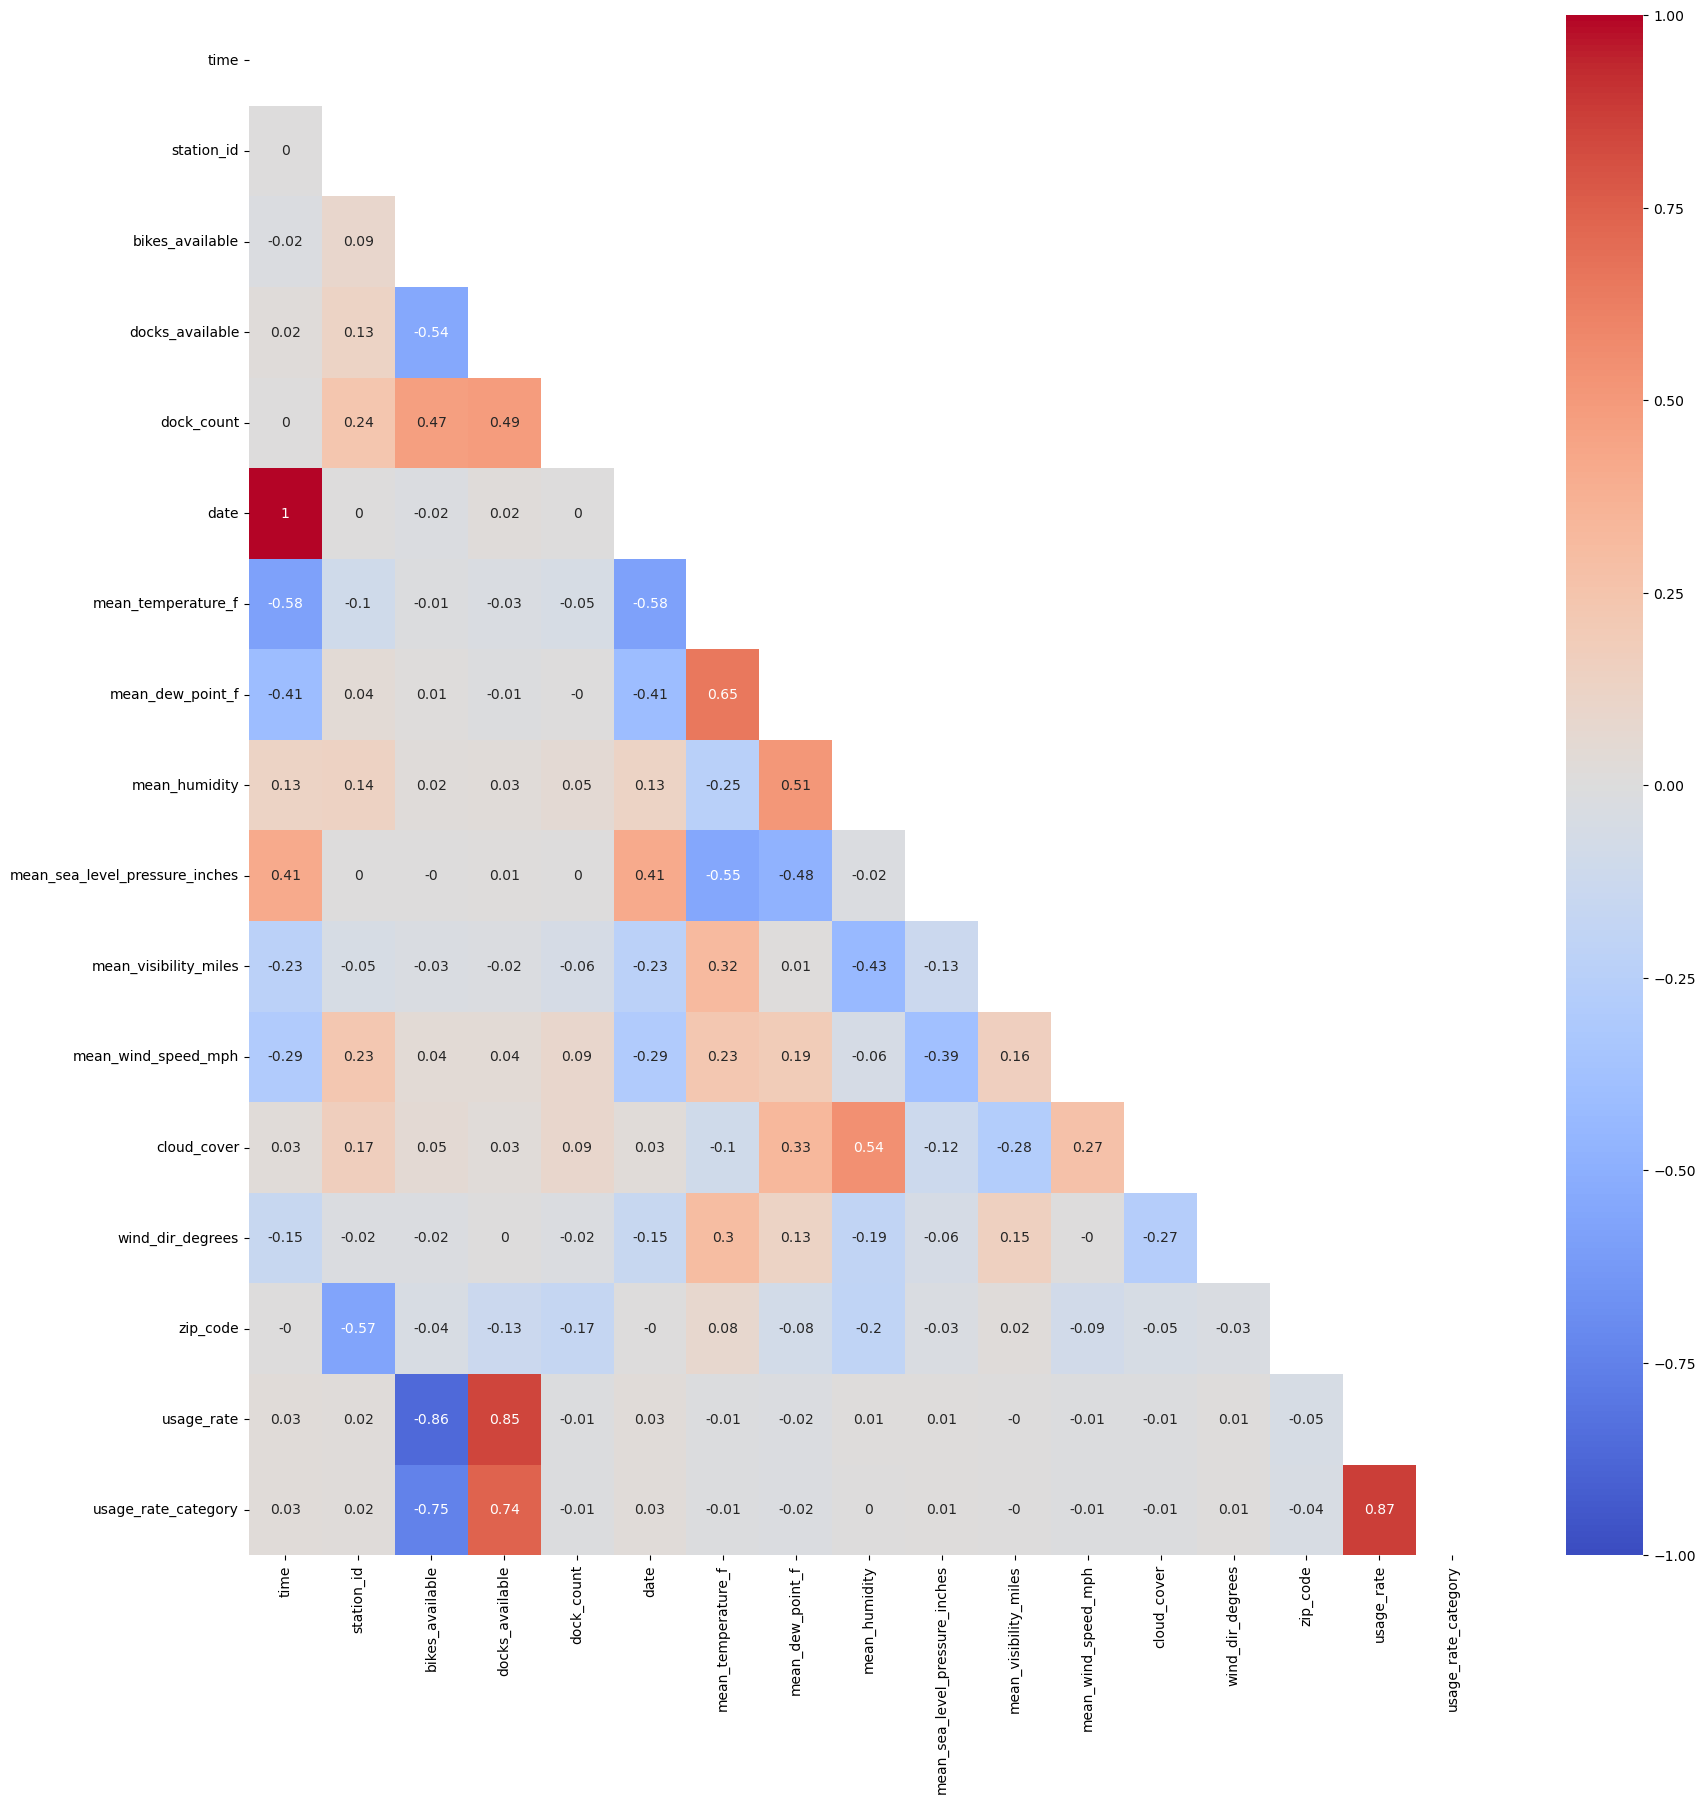

In [24]:
# we can also use heat map to look into the correlation with the number of mosquitoes caught between each independent variable and get the same result as above
corr_df = df.corr()

# mask for upper-triangular
mask = np.triu(corr_df)

# visualise it using seaborn
plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()


From the plot above, we observe that cloud cover is positively correlated with humidity levels, aligning with our common understanding. Additionally, the following columns require careful handling to avoid collinearity:

- 'time' is highly correlated with 'date' --> one of these variables should be removed.
- 'usage_rate' is highly correlated with 'usage_rate_category' --> one of these variables should be removed.
- 'usage_rate' is highly correlated with 'docks_available' --> one of these variables should be removed.
- 'usage_rate' is highly correlated with 'bikes_available' --> one of these variables should be removed.
- 'mean_temperature_f' is correlated with 'time' --> one of these variables should be removed.
- 'mean_temperature_f' is correlated with 'date' --> one of these variables should be removed.
- 'mean_dew_point_f' is correlated with 'mean_temperature_f' --> one of these variables should be removed.

To address these correlations, we need to take out one variable from each pair to avoid collinearity.

<Axes: xlabel='time', ylabel='date'>

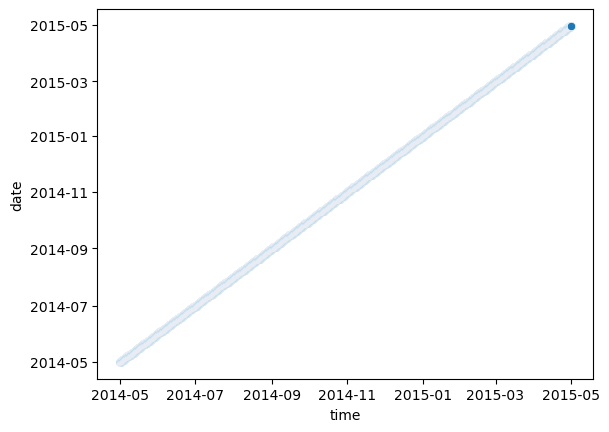

In [26]:
# Plottting a scatterplot between 'time' and 'date' columns
sns.scatterplot(x='time', y='date', data=df)

It is not surprising to observe a high correlation between the 'date' and 'time' columns, as both columns store the same date information.

<Axes: xlabel='usage_rate', ylabel='usage_rate_category'>

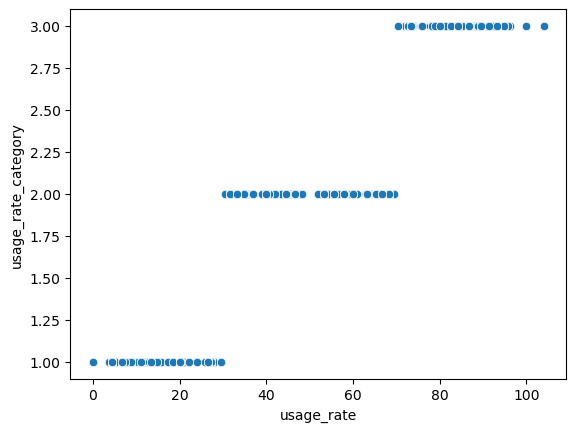

In [27]:
# Plottting a scatterplot between 'usage_rate' and 'usage_rate_category' columns
sns.scatterplot(x='usage_rate', y='usage_rate_category', data=df)

The 'usage_rate_category' was defined based on the values of the 'usage_rate' column, resulting in a high correlation between the two.

<Axes: xlabel='usage_rate', ylabel='docks_available'>

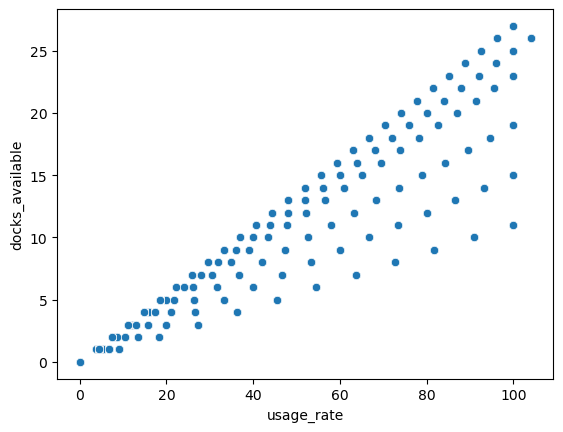

In [28]:
# Plottting a scatterplot between 'usage_rate' and 'docks_available' columns
sns.scatterplot(x='usage_rate', y='docks_available', data=df)

The 'usage_rate' column was created by dividing 'docks_available' by 'dock_count' in the DataFrame. Therefore, it is expected that 'usage_rate' and 'docks_available' are highly correlated.

<Axes: xlabel='usage_rate', ylabel='bikes_available'>

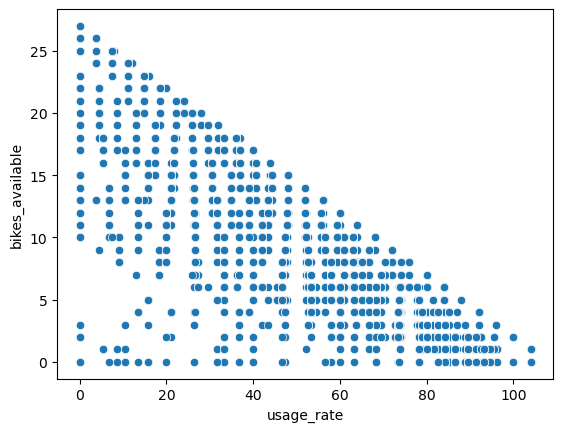

In [29]:
# Plottting a scatterplot between 'usage_rate' and 'bikes_available' columns
sns.scatterplot(x='usage_rate', y='bikes_available', data=df)

The 'usage_rate' column was created by dividing 'bikes_available' by 'dock_count' in the DataFrame. Since 'dock_count' is the sum of 'bikes_available' and 'docks_available', it is expected that 'usage_rate' and 'bikes_available' are highly correlated.

<Axes: xlabel='mean_temperature_f', ylabel='time'>

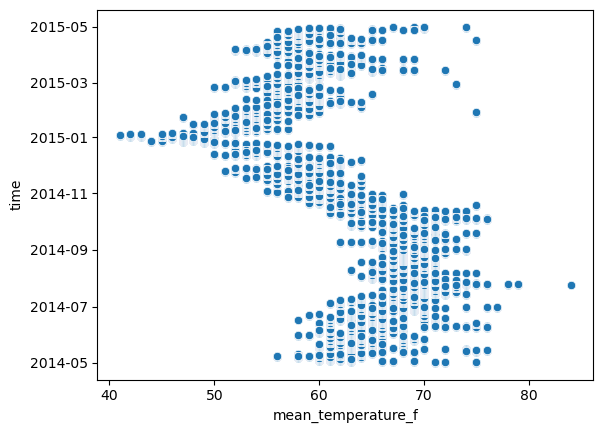

In [30]:
# Plottting a scatterplot between 'mean_temperature_f' and 'time' columns
sns.scatterplot(x='mean_temperature_f', y='time', data=df)

<Axes: xlabel='mean_temperature_f', ylabel='date'>

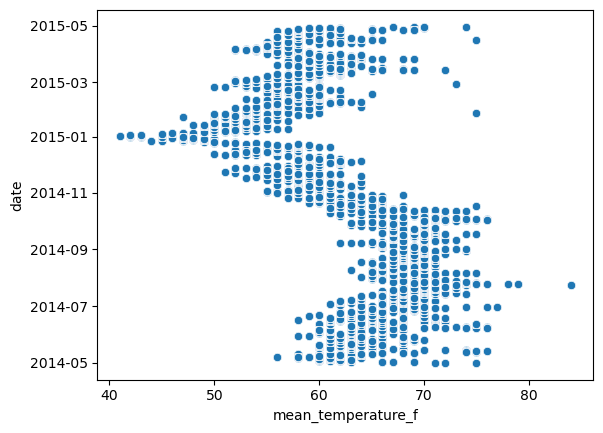

In [31]:
# Plottting a scatterplot between 'mean_temperature_f' and 'date' columns
sns.scatterplot(x='mean_temperature_f', y='date', data=df)

Given that the 'date' and 'time' columns essentially contain the same date information, so that their graphs are exactly identical. These graphs show that the 'mean_temperature_f' column is highly correlated with date.

<Axes: xlabel='mean_dew_point_f', ylabel='mean_temperature_f'>

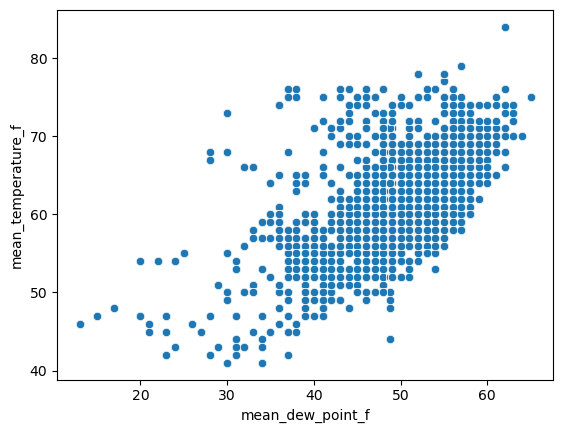

In [32]:
# Plottting a scatterplot between 'mean_dew_point_f' and 'mean_temperature_f' columns
sns.scatterplot(x='mean_dew_point_f', y='mean_temperature_f', data=df)

The scatter plot shows that there is correlation between mean_dew_point_f and mean_temperature_f. 